<a href="https://colab.research.google.com/github/yunruyeh/Data-Station-/blob/main/%E6%95%B8%E6%93%9A%E7%AB%B6%E8%B3%BD_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#讀取檔案
import pandas as pd
#切割檔案
from sklearn.model_selection import train_test_split
#LogisticRegression
from sklearn.linear_model import LogisticRegression
#Roc
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import classification_report
#繪圖
import matplotlib.pyplot as plt
#numpy
import numpy as np
#lightgbm
import lightgbm as lgb
#xgboost
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from xgboost.sklearn import XGBClassifier
from sklearn.cluster import KMeans
# 可以去掉 python 輸出時，因為軟體版本所引起的警告的警告。
import warnings
warnings.filterwarnings('ignore')

# 具健康意識消費分析

In [ ]:
df_healthy = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/data 數據競賽/發票整理(已過濾).csv')
df_healthy

,名稱,單價,數量,小計,發票開立時間,性別,年齡,會員流水號,縣市
0,3點一刻減糖日月潭奶茶5入,50.0,1,50.0,15:20:25,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e,None
1,3點一刻減糖炭燒奶茶5入,50.0,1,50.0,15:20:25,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e,None
2,全麥三明治-鮮蔬鮪魚,45.0,1,45.0,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1,台中市
3,全麥三明治-迷迭香烤腿排,60.0,1,55.0,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1,台中市
4,*統一陽光無加糖高纖豆漿450ml盒,20.0,1,20.0,00:41:49,0,48,fab5342d57dd50dc4cf79287ad6345d74282f742,桃園市
...,...,...,...,...,...,...,...,...,...
1659263,(A)統一陽光無加糖高纖豆漿450ml,20.0,1,20.0,19:49:44,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市
1659264,愛之味牛奶燕麥290ml,30.0,1,30.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市
1659265,(A)質立希臘式優格(無加糖),35.0,1,35.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市
1659266,(A)新感覺雞蛋沙拉,30.0,1,30.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市


In [ ]:
def date(x):
    x = x[0:3]
    return x

df_healthy['深夜消費'] = df_healthy['發票開立時間'].apply(date)
df_healthy

,名稱,單價,數量,小計,發票開立時間,性別,年齡,會員流水號,縣市,深夜消費
0,3點一刻減糖日月潭奶茶5入,50.0,1,50.0,15:20:25,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e,None,15
1,3點一刻減糖炭燒奶茶5入,50.0,1,50.0,15:20:25,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e,None,15
2,全麥三明治-鮮蔬鮪魚,45.0,1,45.0,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1,台中市,00
3,全麥三明治-迷迭香烤腿排,60.0,1,55.0,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1,台中市,00
4,*統一陽光無加糖高纖豆漿450ml盒,20.0,1,20.0,00:41:49,0,48,fab5342d57dd50dc4cf79287ad6345d74282f742,桃園市,00
...,...,...,...,...,...,...,...,...,...,...
1659263,(A)統一陽光無加糖高纖豆漿450ml,20.0,1,20.0,19:49:44,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市,19
1659264,愛之味牛奶燕麥290ml,30.0,1,30.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市,20
1659265,(A)質立希臘式優格(無加糖),35.0,1,35.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市,20
1659266,(A)新感覺雞蛋沙拉,30.0,1,30.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市,20


In [ ]:
type(df_healthy['深夜消費'][0])

numpy.int64

In [ ]:
df_healthy['深夜消費'] = df_healthy['深夜消費'].astype(int)

In [ ]:
df1 = df_healthy[(df_healthy['深夜消費'] >= 23) | (df_healthy['深夜消費'] <= 5)]    #pandas 多重條件篩選
df1

,名稱,單價,數量,小計,發票開立時間,性別,年齡,會員流水號,縣市,深夜消費
2,全麥三明治-鮮蔬鮪魚,45.0,1,45.0,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1,台中市,0
3,全麥三明治-迷迭香烤腿排,60.0,1,55.0,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1,台中市,0
4,*統一陽光無加糖高纖豆漿450ml盒,20.0,1,20.0,00:41:49,0,48,fab5342d57dd50dc4cf79287ad6345d74282f742,桃園市,0
5,全麥三明治-養生蔬菜,45.0,1,45.0,00:49:55,0,42,0b11342ba13e0bebe1acda7d16718bea0d87f272,新竹市,0
6,*統一陽光低糖高纖豆漿450ml(盒),20.0,1,20.0,00:53:45,1,36,98817de82a5454ff32e44f2e9fb212f7bf2a49a5,新北市,0
...,...,...,...,...,...,...,...,...,...,...
1659197,統一陽光無糖高纖豆漿,20.0,1,20.0,00:49:45,1,27,aceaec893f3b9dbda444cf9135e37ae6f0a7a58c,桃園市,0
1659198,茶裏王日式無糖綠茶PET975,32.0,1,32.0,23:04:26,1,27,aceaec893f3b9dbda444cf9135e37ae6f0a7a58c,桃園市,23
1659225,HallsXS無糖迷你薄荷糖酷冰藍莓,39.0,1,39.0,23:57:15,1,30,d8e42e7efaa78555be9f916dfe93e53d244e42bc,桃園市,23
1659226,HallsXS無糖迷你薄荷糖綜合莓果,39.0,1,39.0,23:57:15,1,30,d8e42e7efaa78555be9f916dfe93e53d244e42bc,桃園市,23


In [ ]:
def eleven(x):
  if x == 23 or (0<=x and x<=5):
    x=1
  else:
    x=0
  return x

df_healthy['深夜消費'] = df_healthy['深夜消費'].apply(eleven)
df_healthy

,名稱,單價,數量,小計,發票開立時間,性別,年齡,會員流水號,縣市,深夜消費
0,3點一刻減糖日月潭奶茶5入,50.0,1,50.0,15:20:25,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e,None,0
1,3點一刻減糖炭燒奶茶5入,50.0,1,50.0,15:20:25,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e,None,0
2,全麥三明治-鮮蔬鮪魚,45.0,1,45.0,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1,台中市,1
3,全麥三明治-迷迭香烤腿排,60.0,1,55.0,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1,台中市,1
4,*統一陽光無加糖高纖豆漿450ml盒,20.0,1,20.0,00:41:49,0,48,fab5342d57dd50dc4cf79287ad6345d74282f742,桃園市,1
...,...,...,...,...,...,...,...,...,...,...
1659263,(A)統一陽光無加糖高纖豆漿450ml,20.0,1,20.0,19:49:44,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市,0
1659264,愛之味牛奶燕麥290ml,30.0,1,30.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市,0
1659265,(A)質立希臘式優格(無加糖),35.0,1,35.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市,0
1659266,(A)新感覺雞蛋沙拉,30.0,1,30.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市,0


## 篩選55-70年齡

In [ ]:
df2 = df_healthy[(df_healthy['年齡']>=55) & (df_healthy['年齡']<=70)]
df2

,名稱,單價,數量,小計,發票開立時間,性別,年齡,會員流水號,縣市,深夜消費
11,桂格即食大燕麥片,379.0,2,598.0,02:22:24,0,55,c7a6670a4f827d7db33451c6db9728e3dfe2f87b,台北市,1
12,桂格鮮榖王堅果多穀,142.0,1,71.0,02:22:24,0,55,c7a6670a4f827d7db33451c6db9728e3dfe2f87b,台北市,1
17,144083@安佳低脂切片乳酪24片,179.0,1,179.0,03:17:56,0,59,e6ee5ffbde937fb2288b4577096c0af94976b81a,台南市,1
18,295848@台灣花椰菜500G/顆,39.0,1,39.0,03:17:56,0,59,e6ee5ffbde937fb2288b4577096c0af94976b81a,台南市,1
32,愛之味純濃燕麥,269.0,2,538.0,02:27:58,0,64,79dd38d675d13c5e934a3c3bc548546d3f969740,新北市,1
...,...,...,...,...,...,...,...,...,...,...
1659106,軟法蛋沙拉堡(素),80.0,1,80.0,13:54:59,0,55,5740c7a252df69059c4e4a37ec108e1e1b5ede0b,台北市,0
1659107,本味誠現 穀香燕麥餅/200g[200G],89.0,1,89.0,19:56:42,0,55,5740c7a252df69059c4e4a37ec108e1e1b5ede0b,新北市,0
1659108,低鈉吐司,39.0,1,39.0,14:42:53,0,55,5740c7a252df69059c4e4a37ec108e1e1b5ede0b,台北市,0
1659109,桂格有機燕麥片,260.0,1,189.0,14:37:35,0,55,5740c7a252df69059c4e4a37ec108e1e1b5ede0b,新北市,0


In [ ]:
len(df2['深夜消費'] == 0)

28513

58.814802    1
58.982421    1
Name: 年齡, dtype: int64


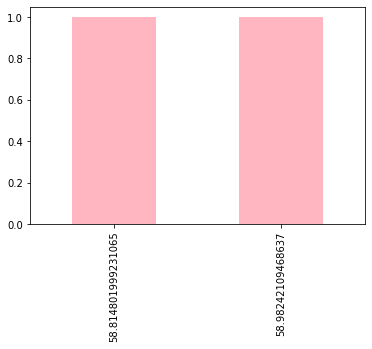

In [ ]:
member = df2.groupby(['深夜消費']).agg({'年齡':np.mean})
count_classes = pd.value_counts(member['年齡'], sort=True).sort_index()
count_classes.plot(kind='bar',color='lightpink')
print(count_classes)

# 視覺化

In [ ]:
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip'
!mkdir /tmp/fonts
!unzip -o NotoSansCJKtc-hinted.zip -d /tmp/fonts/
!mv /tmp/fonts/NotoSansMonoCJKtc-Regular.otf /usr/share/fonts/truetype/NotoSansMonoCJKtc-Regular.otf -f
!rm -rf /tmp/fonts
!rm NotoSansCJKtc-hinted.zip

--2022-09-25 14:57:46--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 142.251.16.128, 2607:f8b0:4004:c17::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M   160MB/s    in 0.7s    

2022-09-25 14:57:47 (160 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
  inflating: /tmp/fonts/LICENSE_OFL.txt  
  inflating: /tmp/fonts/NotoSansCJKtc-Black.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Bold.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-DemiLight.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Light.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Medium.otf  
  inflating: 

In [ ]:
# 指定字體
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

font_dirs = ['/usr/share/fonts/truetype/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"

## 總覽

0.0    49780
1.0    29241
Name: 性別, dtype: int64


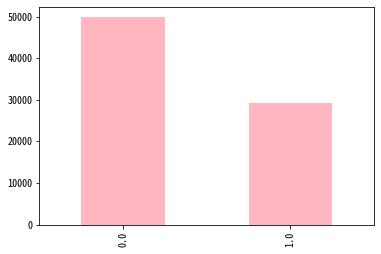

In [ ]:
member = df_healthy.groupby(['會員流水號']).agg({'性別':np.mean})
count_classes = pd.value_counts(member['性別'], sort=True).sort_index()
count_classes.plot(kind='bar',color='lightpink')
print(count_classes)

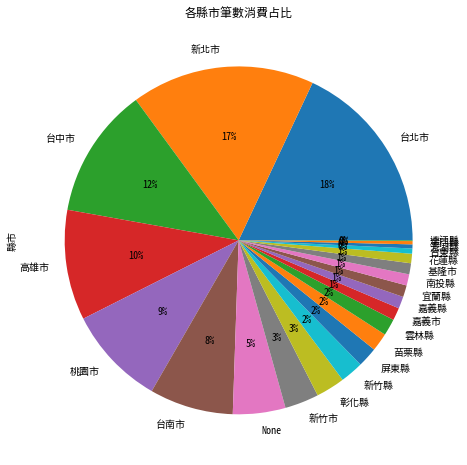

In [ ]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
df_healthy['縣市'].value_counts().plot.pie(figsize=(8, 8),autopct='%1.0f%%',title='各縣市筆數消費占比')

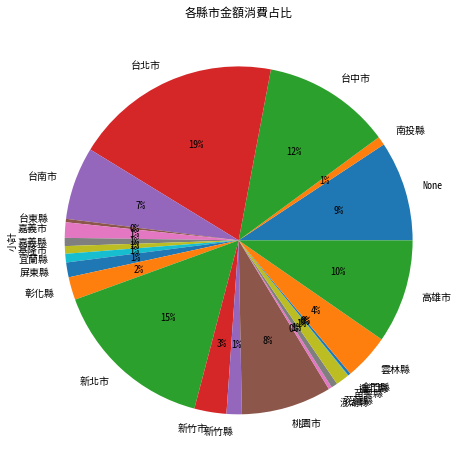

In [ ]:
df_healthy.groupby(['縣市']).sum()['小計'].plot.pie(figsize=(8, 8),autopct='%1.0f%%',title='各縣市金額消費占比')

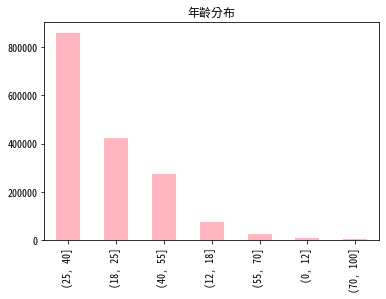

In [ ]:
df_healthy['年齡帶'] = pd.cut(x=df_healthy['年齡'], bins=[0, 12, 18, 25,40,55,70,100])
df_healthy['年齡帶'].value_counts().plot.bar(title='年齡分布',color='lightpink')

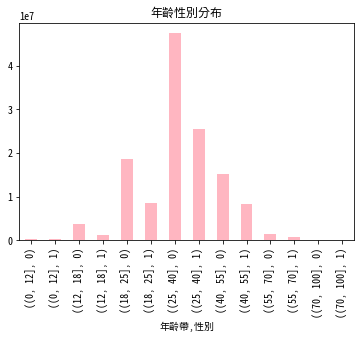

In [ ]:
df_healthy.groupby(['年齡帶','性別']).sum()['小計'].plot.bar(title='年齡性別分布',color='lightpink')

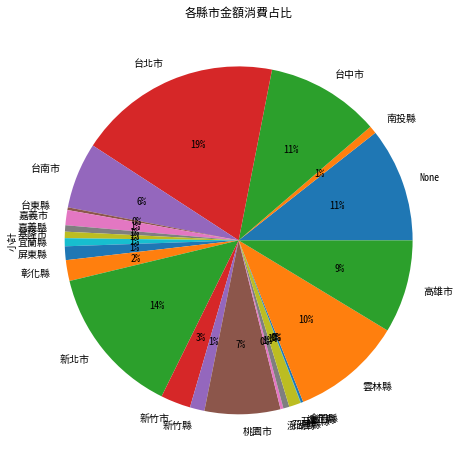

In [ ]:
df1.groupby(['縣市']).sum()['小計'].plot.pie(figsize=(8, 8),autopct='%1.0f%%',title='各縣市金額消費占比')

## 分析25-40歲客群

0.0    16297
1.0    10318
Name: 性別, dtype: int64


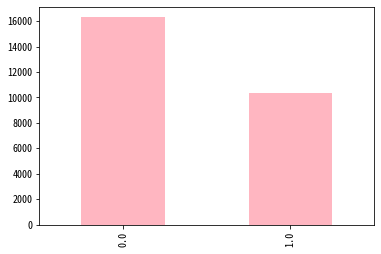

In [ ]:
member = df1.groupby(['會員流水號']).agg({'性別':np.mean})
count_classes = pd.value_counts(member['性別'], sort=True).sort_index()
count_classes.plot(kind='bar',color='lightpink')
print(count_classes)

In [ ]:
keywords = '無糖|無加糖|減糖|減醣|減脂|減鹽|少鹽|沙拉|低卡|零卡|0卡|零熱量|低醣|低糖|低油|全穀|五穀|藜麥|燕麥|糙米|雞胸|酪梨|櫛瓜|堅果|蒟蒻|低脂|脫脂|高纖\
|低鈉|低鹽|高蛋白|蛋白質|原型食物|健身|瘦身|減重|減肥|養生|生酮|斷食|防彈咖啡|全麥|花椰菜'
wrong = '沙拉油|沙拉脫|桂冠沙拉|肉鬆沙拉|龍蝦沙拉|鹽酥雞'

#最快

df1 = df1.loc[df1['名稱'].str.contains(keywords, na=False)]
df1 = df1.loc[df1['名稱'].str.contains(wrong, na=False) == False]

df1

,名稱,單價,數量,小計,發票開立時間,性別,年齡,會員流水號,縣市
0,3點一刻減糖日月潭奶茶5入,50.0,1,50.0,15:20:25,0.0,29.0,d3d02a65388a9448d2273c27a3c5304d36bf2d8e,None
1,3點一刻減糖炭燒奶茶5入,50.0,1,50.0,15:20:25,0.0,29.0,d3d02a65388a9448d2273c27a3c5304d36bf2d8e,None
6,*統一陽光低糖高纖豆漿450ml(盒),20.0,1,20.0,00:53:45,1.0,36.0,98817de82a5454ff32e44f2e9fb212f7bf2a49a5,新北市
7,貝果-養生蔬菜,60.0,1,64.0,01:45:29,1.0,40.0,4dc7cae922994b0755ef35524a08791f1acbb746,台北市
13,愛呷肉-低脂牛肉,238.0,1,238.0,03:12:20,1.0,40.0,0e980198c7dac9113f8f9046f147750f3d7b2e54,彰化縣
...,...,...,...,...,...,...,...,...,...
889073,義美無糖高纖豆奶,25.0,1,25.0,09:19:28,0.0,30.0,ce77e11e9f09226b0978870bd72cdbc2c33e175f,台北市
889074,統一陽光無加糖黑豆漿400ml,25.0,1,25.0,11:43:11,1.0,32.0,8a58bddc5b49679d63b9e633d03c1603029de699,高雄市
889075,*桂格100%喝的燕麥290ml,30.0,1,30.0,08:21:34,0.0,31.0,9282ccd057ccc2118e861e80f90528bfd350b017,高雄市
889076,*統一陽光無加糖高纖豆漿450ml盒,20.0,1,20.0,08:44:58,1.0,25.0,d2ff263350e03421453e565f2c2b64a0e9f77930,新竹市


#全穀雜糧類

In [ ]:
keywords = '燕麥|麵包|吐司|飯|米|全麥|饅頭|蕃薯|地瓜|薏仁|藜麥|全麥|小麥|大麥|蕎麥|南瓜子|核桃|芋頭|南瓜|山藥|蓮藕|馬鈴薯|米粉|冬粉|河粉|寬粉|板條|花豆|蠶豆|皇帝豆|栗子|蓮子|菱角|洋芋|堡|糕'
wrong = '潤膚霜|堅果棒|狗|洗髮精|茶|沐浴乳'

df2 = df_healthy
df2 = df2.loc[df2['名稱'].str.contains(keywords, na=False)]
df2 = df2.loc[df2['名稱'].str.contains(wrong, na=False) == False]

df2

,名稱,單價,數量,小計,發票開立時間,性別,年齡,會員流水號,縣市,深夜消費
2,全麥三明治-鮮蔬鮪魚,45.0,1,45.0,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1,台中市,00
3,全麥三明治-迷迭香烤腿排,60.0,1,55.0,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1,台中市,00
5,全麥三明治-養生蔬菜,45.0,1,45.0,00:49:55,0,42,0b11342ba13e0bebe1acda7d16718bea0d87f272,新竹市,00
8,有機堅果花生熱壓吐司,30.0,1,30.0,02:22:38,0,42,448413ddcd22671621a75d31eaf11913dcbf2471,新北市,02
10,*統一陽光糙米漿450ml(盒),20.0,1,20.0,00:04:03,1,53,b114d5fc37ad4dcf426dcbe9749f8fded2d872f4,新竹縣,00
...,...,...,...,...,...,...,...,...,...,...
1659244,大燕麥片水果優,80.0,1,80.0,16:01:45,1,25,16bcdb63922dd6c6d861247a0252d1476b1fd234,桃園市,16
1659257,米蘭雞腿藜麥飯,180.0,1,180.0,18:12:15,0,32,c69d17bd847a2b1749a6143da44bcb576596adf6,桃園市,18
1659258,炭燒里肌豬肉藜麥飯,180.0,1,180.0,12:56:47,0,32,c69d17bd847a2b1749a6143da44bcb576596adf6,桃園市,12
1659264,愛之味牛奶燕麥290ml,30.0,1,30.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市,20


#蛋豆魚肉類

In [ ]:
keywords = '魚|牛|豬|肉|雞|鴨|鵝|黃豆|黑豆|海鮮|蛋|蝦|貝|螃蟹|蛤蜊|鯛|鰻|蚵|九孔|鮑魚|螺|小卷|中卷|花枝|牡蠣|蜆|海膽|海參|章魚|火腿|培根|魷魚|烏賊|透抽'
wrong = '潤膚霜|堅果棒|狗|洗髮精|茶|沐浴乳|紅豆|綠豆|花豆|蠶豆|皇帝豆|貝果|牛乳'

df3 = df_healthy
df3 = df3.loc[df3['名稱'].str.contains(keywords, na=False)]
df3 = df3.loc[df3['名稱'].str.contains(wrong, na=False) == False]

df3

,名稱,單價,數量,小計,發票開立時間,性別,年齡,會員流水號,縣市,深夜消費
2,全麥三明治-鮮蔬鮪魚,45.0,1,45.0,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1,台中市,00
13,愛呷肉-低脂牛肉,238.0,1,238.0,03:12:20,1,40,0e980198c7dac9113f8f9046f147750f3d7b2e54,彰化縣,03
14,愛呷菜-低脂牛肉,238.0,1,238.0,03:12:20,1,40,0e980198c7dac9113f8f9046f147750f3d7b2e54,彰化縣,03
23,藜麥燒肉珍珠堡,75.0,1,75.0,03:03:29,0,75,6ceb82d472aabd6e7e11b6671349398e490f6582,新北市,03
26,雞肉地瓜總匯沙拉,65.0,1,65.0,04:33:16,0,30,72aeb13562c27e024323ea72e0e7acf886b21b62,桃園市,04
...,...,...,...,...,...,...,...,...,...,...
1659258,炭燒里肌豬肉藜麥飯,180.0,1,180.0,12:56:47,0,32,c69d17bd847a2b1749a6143da44bcb576596adf6,桃園市,12
1659262,(吊A)大成舒迷雞胸肉,59.0,1,59.0,19:49:44,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市,19
1659264,愛之味牛奶燕麥290ml,30.0,1,30.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市,20
1659266,(A)新感覺雞蛋沙拉,30.0,1,30.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市,20


#乳品類

In [ ]:
keywords = '乳|奶|起司|乳酪|芝士|優格|乾酪'
wrong = '潤膚霜|堅果棒|狗|洗髮精|茶|沐浴乳|紅豆|綠豆|花豆|蠶豆|皇帝豆|貝果|豆奶|洗髮乳|洗面乳|身體乳|養生包'

df4 = df_healthy
df4 = df4.loc[df4['名稱'].str.contains(keywords, na=False)]
df4 = df4.loc[df4['名稱'].str.contains(wrong, na=False) == False]

df4

,名稱,單價,數量,小計,發票開立時間,性別,年齡,會員流水號,縣市,深夜消費
9,*瑞穗鮮乳-低脂鮮乳400ml(盒),45.0,1,45.0,02:03:16,1,41,4133f7f16e035381e8e5f4da8064517607551538,桃園市,02
15,ＡＢ優酪乳無加糖９０,79.0,1,79.0,03:20:06,0,33,511d4f062cbbc893082a7ec7c9c4e251313d3f0b,台南市,03
17,144083@安佳低脂切片乳酪24片,179.0,1,179.0,03:17:56,0,59,e6ee5ffbde937fb2288b4577096c0af94976b81a,台南市,03
20,光泉低脂牛乳,82.0,1,82.0,03:59:00,1,29,f2c3628792c8f1f65f054d292e5c0be312c2b513,新北市,03
24,義美低脂鮮奶,84.0,1,84.0,00:26:00,1,39,efe6dc92569b5031b1445e5fe847f4d2b604d084,新北市,00
...,...,...,...,...,...,...,...,...,...,...
1659219,ＡＢ優酪乳無加糖,28.0,4,112.0,08:48:40,1,41,e78fd1801f5701c5e4799dac0117c18ef2e927c1,台北市,08
1659223,簡單點優酪乳無加糖,20.0,1,10.0,21:24:13,1,30,d8e42e7efaa78555be9f916dfe93e53d244e42bc,桃園市,21
1659246,中-許慶良酪梨鮮奶,70.0,1,70.0,21:05:34,1,25,16bcdb63922dd6c6d861247a0252d1476b1fd234,桃園市,21
1659264,愛之味牛奶燕麥290ml,30.0,1,30.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市,20


#油脂與堅果種類

In [ ]:
keywords = '油|腰果|仁|夏威夷豆|無花果|堅果|芝麻|花生|開心果|榛果|瓜子|栗|鷹嘴豆'
wrong = '潤膚霜|狗|洗髮精|茶|沐浴乳|貝果|豆奶|洗面乳|身體乳|養生包|硬喉糖|薏仁|飼料|油切|洗髮'

df5 = df_healthy
df5 = df5.loc[df5['名稱'].str.contains(keywords, na=False)]
df5 = df5.loc[df5['名稱'].str.contains(wrong, na=False) == False]

df5

,名稱,單價,數量,小計,發票開立時間,性別,年齡,會員流水號,縣市,深夜消費
8,有機堅果花生熱壓吐司,30.0,1,30.0,02:22:38,0,42,448413ddcd22671621a75d31eaf11913dcbf2471,新北市,02
12,桂格鮮榖王堅果多穀,142.0,1,71.0,02:22:24,0,55,c7a6670a4f827d7db33451c6db9728e3dfe2f87b,台北市,02
37,桂格燕麥堅果王,55.0,1,55.0,06:01:06,1,34,325a32faeb3fd46e9e8ce72fd857156e742f6c09,南投縣,06
42,洽洽每日堅果,125.0,1,125.0,05:47:49,0,52,196ea8531ef6ae11918f92abf61fe57e521d4dcb,台中市,05
55,Ahuacatlan酪梨油1L,395.0,1,369.0,01:44:39,1,60,c054a7a11f47a1b688ba37eef34e27541e2dd4e8,台南市,01
...,...,...,...,...,...,...,...,...,...,...
1659005,油雞胸肉,116.0,1,116.0,13:16:01,0,50,bc1a5fe10c764ce8e1a0e2cccd706416f382710f,高雄市,13
1659031,桂格燕麥堅果王290ml,30.0,1,30.0,08:00:13,0,45,f82f72dadc94395e4c9962e7d2ee954e8addd30b,桃園市,08
1659047,桂格燕麥堅果王,53.0,1,53.0,16:16:16,0,39,5013fee824272c01056a5782a5da2fe3b7e847f6,桃園市,16
1659115,桂格穀珍堅果杏,89.0,1,89.0,18:36:45,0,45,c44a3a98789475b1525a14c2bbfc78c7fb6cad9f,台北市,18


#蔬菜類

In [ ]:
keywords = '菜|洋蔥|蘿蔔|蒜|葉|韭|筍|薑|沙拉|大陸妹|櫛瓜|萵苣|茼蒿|黃瓜|絲瓜|菜瓜|冬瓜|茄子|苦瓜|蒲瓜|椒|芽|秋葵|藻|海帶|菇|木耳|松茸|甘藍|番茄'
wrong = '潤膚霜|狗|洗髮精|茶|沐浴乳|貝果|豆奶|洗面乳|身體乳|養生包|硬喉糖|薏仁|飼料|油切|洗髮|椒鹽|蒜香|小沙拉|桂冠千島沙拉'

df6 = df_healthy
df6 = df6.loc[df6['名稱'].str.contains(keywords, na=False)]
df6 = df6.loc[df6['名稱'].str.contains(wrong, na=False) == False]

df6

,名稱,單價,數量,小計,發票開立時間,性別,年齡,會員流水號,縣市,深夜消費
5,全麥三明治-養生蔬菜,45.0,1,45.0,00:49:55,0,42,0b11342ba13e0bebe1acda7d16718bea0d87f272,新竹市,00
14,愛呷菜-低脂牛肉,238.0,1,238.0,03:12:20,1,40,0e980198c7dac9113f8f9046f147750f3d7b2e54,彰化縣,03
18,295848@台灣花椰菜500G/顆,39.0,1,39.0,03:17:56,0,59,e6ee5ffbde937fb2288b4577096c0af94976b81a,台南市,03
26,雞肉地瓜總匯沙拉,65.0,1,65.0,04:33:16,0,30,72aeb13562c27e024323ea72e0e7acf886b21b62,桃園市,04
30,一日野菜-八種蔬菜溫沙拉,69.0,1,69.0,05:00:58,0,38,c6a13f1bd76a27d7958595ce1fb955e76a0fbde9,新北市,05
...,...,...,...,...,...,...,...,...,...,...
1659249,配-清爽沙拉,22.0,1,22.0,21:02:00,1,25,16bcdb63922dd6c6d861247a0252d1476b1fd234,None,21
1659251,波蜜低卡果菜汁,25.0,2,24.0,09:31:49,0,28,0cab3cd430f403d72188c60154683b60a6b10fa9,桃園市,09
1659255,鹽麴雞腿溫沙拉,69.0,1,69.0,08:47:15,0,32,c69d17bd847a2b1749a6143da44bcb576596adf6,桃園市,08
1659256,(A)21風味館香草烤雞沙拉,69.0,1,69.0,08:47:15,0,32,c69d17bd847a2b1749a6143da44bcb576596adf6,桃園市,08


#水果類

In [ ]:
keywords = '果|西瓜|哈密瓜|香瓜|甜瓜|美濃瓜|番茄|梨|楊桃|蓮霧|葡萄|李|桃|龍眼|荔枝|釋迦|柿|琵琶|棗|蕉|柑|橘|柳橙|柳丁|柚子|文旦|芭樂|檸檬|草莓|藍莓|青木瓜|桑椹'
wrong = '潤膚霜|狗|洗髮精|茶|沐浴乳|貝果|豆奶|洗面乳|身體乳|養生包|硬喉糖|薏仁|飼料|油切|髮|椒鹽|蒜香|小沙拉|桂冠千島沙拉|堅果|開心果|腰果|糖|比菲多|綜合果|堅果|油|米果|橘平屋|盛香珍|面膜|胡桃|蒟蒻|果凍|刺繡襪'

df7 = df_healthy
df7 = df7.loc[df7['名稱'].str.contains(keywords, na=False)]
df7 = df7.loc[df7['名稱'].str.contains(wrong, na=False) == False]

df7

,名稱,單價,數量,小計,發票開立時間,性別,年齡,會員流水號,縣市,深夜消費
57,酪梨佐雞肉沙拉,299.0,1,299.0,07:38:56,1,41,5535d390fa72bdaf474f432872e22c6cf2c823c1,新北市,07
152,酪梨佐雞肉沙拉,299.0,1,299.0,09:49:25,1,21,230735913ce17cc49c7f6025e44d682e3aeb837f,新北市,09
405,波蜜低卡果菜汁,25.0,1,25.0,01:27:00,1,29,8899dea8817e7c3f4723c4689855b85d3f08e35b,台北市,01
416,波蜜低卡蔬果汁飲料400ml,25.0,1,25.0,00:29:46,1,40,6148099ab23cc7329d992db6e2b0ce33adc82927,台北市,00
447,波蜜低卡果菜汁,25.0,1,25.0,01:44:00,1,44,1efe8c7fd2a7521aeb567922b2fedb52609d4eef,新竹縣,01
...,...,...,...,...,...,...,...,...,...,...
1659071,季節酪梨雞肉捲,259.0,1,259.0,17:45:12,0,51,34eda7e08de42b4134283c948a190a1f3ed009e4,台北市,17
1659093,柚香檸檬雞胸肉,99.0,1,99.0,17:53:13,1,43,fbed9dd9a8e8a46c084fe4f2c622ff6949efd91b,台北市,17
1659244,大燕麥片水果優,80.0,1,80.0,16:01:45,1,25,16bcdb63922dd6c6d861247a0252d1476b1fd234,桃園市,16
1659246,中-許慶良酪梨鮮奶,70.0,1,70.0,21:05:34,1,25,16bcdb63922dd6c6d861247a0252d1476b1fd234,桃園市,21


## K-means1 (取平均)

In [ ]:
df_KM1 = df_healthy.groupby(['會員流水號']).agg('mean')
df_KM1.columns = ['單價(平均)','數量(平均)','小計(平均)','性別','年齡']
df_KM1

,單價(平均),數量(平均),小計(平均),性別,年齡
會員流水號,,,,,
00004f080cd66218c212f2cb212b2abc55d7fe52,65.266667,1.000000,65.266667,1.0,28.0
000185fbc1189f187c1debb5a7019d77ea2d9263,28.357143,1.142857,31.214286,0.0,34.0
0002f35660e4159860a599dcafb872a744e9e16b,45.464286,1.142857,47.750000,0.0,36.0
0004773b22f807f68067166ea3f2b21af89e1466,57.545455,1.000000,57.545455,0.0,45.0
0004956491c78ae31c2ca148379d5d8abfe2e2f6,34.500000,1.000000,34.500000,1.0,24.0
...,...,...,...,...,...
fff9547755d8f6c554c3bd5ac256ce6f422b91c5,71.312500,1.062500,95.562500,1.0,21.0
fff9f1c6675704969d79cc03537a20005ec9526a,55.729167,1.104167,61.291667,1.0,31.0
fffa8e744c7dc32560866b6d5aa96a72b126ae0a,46.097222,1.027778,48.097222,0.0,21.0


In [ ]:
# 標準化
X = df_KM1[['單價(平均)','數量(平均)','小計(平均)','性別','年齡']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std)

[[-0.02446085 -0.05068732 -0.0442675   1.30476211 -0.20923221]
 [-0.10546526 -0.01948251 -0.11663159 -0.76642324  0.37506765]
 [-0.06792064 -0.01948251 -0.08149185 -0.76642324  0.56983426]
 ...
 [-0.06653155 -0.04461972 -0.08075397 -0.76642324 -0.89091537]
 [-0.01271411 -0.05068732 -0.03289325 -0.76642324  0.08291772]
 [-0.08762862 -0.03703522 -0.10270946 -0.76642324 -0.1118489 ]]


In [ ]:
km = KMeans(n_clusters=3, init='random',random_state=0)
y_pred = km.fit_predict(X_std)

In [ ]:
y_pred

array([2, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
#單價 數量 小計 性別 年齡 全部取平均值的K-means結果
df_KM1['Type'] = y_pred
df_KM1

,單價(平均),數量(平均),小計(平均),性別,年齡,Type
會員流水號,,,,,,
00004f080cd66218c212f2cb212b2abc55d7fe52,65.266667,1.000000,65.266667,1.0,28.0,2
000185fbc1189f187c1debb5a7019d77ea2d9263,28.357143,1.142857,31.214286,0.0,34.0,0
0002f35660e4159860a599dcafb872a744e9e16b,45.464286,1.142857,47.750000,0.0,36.0,0
0004773b22f807f68067166ea3f2b21af89e1466,57.545455,1.000000,57.545455,0.0,45.0,0
0004956491c78ae31c2ca148379d5d8abfe2e2f6,34.500000,1.000000,34.500000,1.0,24.0,2
...,...,...,...,...,...,...
fff9547755d8f6c554c3bd5ac256ce6f422b91c5,71.312500,1.062500,95.562500,1.0,21.0,2
fff9f1c6675704969d79cc03537a20005ec9526a,55.729167,1.104167,61.291667,1.0,31.0,2
fffa8e744c7dc32560866b6d5aa96a72b126ae0a,46.097222,1.027778,48.097222,0.0,21.0,1


In [ ]:
for i in range (0,3):

    print('第{}種類的人數：{}'.format(i,len(df_KM1[df_KM1['Type'] == i])))

第0種類的人數：17556
第1種類的人數：32976
第2種類的人數：28489


In [ ]:
df_KM1.loc[df_KM1['Type'] == 0]

,單價(平均),數量(平均),小計(平均),性別,年齡,Type
會員流水號,,,,,,
000185fbc1189f187c1debb5a7019d77ea2d9263,28.357143,1.142857,31.214286,0.0,34.0,0
0002f35660e4159860a599dcafb872a744e9e16b,45.464286,1.142857,47.750000,0.0,36.0,0
0004773b22f807f68067166ea3f2b21af89e1466,57.545455,1.000000,57.545455,0.0,45.0,0
0007598ca889236fa7559710cbc56150632ef334,43.224359,1.179487,49.205128,0.0,45.0,0
000a5ecfa0d7a14db5fcf48715e8bbd8e81e7522,25.750000,1.000000,25.750000,0.0,49.0,0
...,...,...,...,...,...,...
ffe315055fa70dd9334bae2fb7320b0c62c3e8e0,67.222222,1.148148,71.092593,0.0,38.0,0
ffe5cf1ec8dd8945f9a3215563faeb1349e4414d,51.555556,1.047619,50.523810,0.0,40.0,0
ffed4c4a85e1ee0972495b73e57841ffdf812858,98.777778,1.111111,113.222222,0.0,41.0,0


In [ ]:
df_KM1.loc[df_KM1['Type'] == 1]

,單價(平均),數量(平均),小計(平均),性別,年齡,Type
會員流水號,,,,,,
0004c98cf41b64abdd4e63795bdf3e250812e93c,50.000000,1.000000,50.000000,0.0,17.0,1
0007cad8b78022988c2d7d3963cfe788aef53ec3,38.750000,1.000000,38.450000,0.0,21.0,1
00094416f4430b9463b18f5ee61b7d55d2d32a4d,36.500000,1.333333,52.166667,0.0,18.0,1
000984948743560c339e4ff07ad9595b2153653a,38.166667,1.000000,38.166667,0.0,26.0,1
000a54545b25c231de5dff344e8a05b451828236,177.500000,1.000000,177.500000,0.0,21.0,1
...,...,...,...,...,...,...
fff3c55f409d04e18c507904fd746461ae0a5184,47.066667,1.000000,47.066667,0.0,21.0,1
fff415ea358159cffef2743c5310629c9a4ac5f7,25.346939,1.000000,25.346939,0.0,18.0,1
fffa8e744c7dc32560866b6d5aa96a72b126ae0a,46.097222,1.027778,48.097222,0.0,21.0,1


In [ ]:
df_KM1.loc[df_KM1['Type'] == 2]

,單價(平均),數量(平均),小計(平均),性別,年齡,Type
會員流水號,,,,,,
00004f080cd66218c212f2cb212b2abc55d7fe52,65.266667,1.000000,65.266667,1.0,28.0,2
0004956491c78ae31c2ca148379d5d8abfe2e2f6,34.500000,1.000000,34.500000,1.0,24.0,2
000a8abb145b4ce35248970b1c8a69d10f204937,51.181818,1.000000,51.181818,1.0,22.0,2
000eb53b61a41e0a461c393d28cf4af9df0db9fa,60.909091,1.272727,69.454545,1.0,29.0,2
000eed653acbcb7889bb4b5a55e1716531caf81f,39.000000,1.000000,39.000000,1.0,26.0,2
...,...,...,...,...,...,...
fff5c77db76a5278bcc6e889cac023d09a0448f4,26.654545,1.036364,27.563636,1.0,27.0,2
fff89e026a8df744c24de522366b94f11e8317c5,126.728814,1.050847,127.186441,1.0,43.0,2
fff8f7bf0c267bd33d02b83b38267bb136bbb650,74.666667,1.047619,65.836667,1.0,39.0,2


### 感覺是在用性別年齡分組，意義不大

## K-Means2

In [ ]:
df_KM2 = df_healthy.groupby(['會員流水號']).agg(
平均單價 = pd.NamedAgg(column="單價", aggfunc=np.mean),
數量總和 = pd.NamedAgg(column="數量", aggfunc=np.sum),
小計總和 = pd.NamedAgg(column="小計", aggfunc="sum"),
性別 = pd.NamedAgg(column="性別", aggfunc="first"),
年齡 = pd.NamedAgg(column="年齡", aggfunc="first")
)
#df_KM2.columns = ['單價(平均)','數量(總和)','小計(總和)','性別','年齡']
df_KM2

,平均單價,數量總和,小計總和,性別,年齡
會員流水號,,,,,
00004f080cd66218c212f2cb212b2abc55d7fe52,65.266667,15,979.0,1,28
000185fbc1189f187c1debb5a7019d77ea2d9263,28.357143,16,437.0,0,34
0002f35660e4159860a599dcafb872a744e9e16b,45.464286,32,1337.0,0,36
0004773b22f807f68067166ea3f2b21af89e1466,57.545455,11,633.0,0,45
0004956491c78ae31c2ca148379d5d8abfe2e2f6,34.500000,4,138.0,1,24
...,...,...,...,...,...
fff9547755d8f6c554c3bd5ac256ce6f422b91c5,71.312500,17,1529.0,1,21
fff9f1c6675704969d79cc03537a20005ec9526a,55.729167,53,2942.0,1,31
fffa8e744c7dc32560866b6d5aa96a72b126ae0a,46.097222,74,3463.0,0,21


In [ ]:
# 標準化
X = df_KM2[['平均單價','數量總和','小計總和','性別','年齡']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std)

[[-0.02446085 -0.03318808 -0.04252683  1.30476211 -0.20923221]
 [-0.10546526 -0.03051639 -0.07641111 -0.76642324  0.37506765]
 [-0.06792064  0.01223061 -0.0201457  -0.76642324  0.56983426]
 ...
 [-0.06653155  0.12444149  0.11276569 -0.76642324 -0.89091537]
 [-0.01271411 -0.01715795 -0.0110182  -0.76642324  0.08291772]
 [-0.08762862  0.10841136  0.04737279 -0.76642324 -0.1118489 ]]


In [ ]:
km = KMeans(n_clusters=3, init='random',random_state=0)
y_pred = km.fit_predict(X_std)

In [ ]:
df_KM2['Type'] = y_pred
df_KM2

,平均單價,數量總和,小計總和,性別,年齡,Type
會員流水號,,,,,,
00004f080cd66218c212f2cb212b2abc55d7fe52,65.266667,15,979.0,1,28,0
000185fbc1189f187c1debb5a7019d77ea2d9263,28.357143,16,437.0,0,34,1
0002f35660e4159860a599dcafb872a744e9e16b,45.464286,32,1337.0,0,36,1
0004773b22f807f68067166ea3f2b21af89e1466,57.545455,11,633.0,0,45,1
0004956491c78ae31c2ca148379d5d8abfe2e2f6,34.500000,4,138.0,1,24,0
...,...,...,...,...,...,...
fff9547755d8f6c554c3bd5ac256ce6f422b91c5,71.312500,17,1529.0,1,21,0
fff9f1c6675704969d79cc03537a20005ec9526a,55.729167,53,2942.0,1,31,0
fffa8e744c7dc32560866b6d5aa96a72b126ae0a,46.097222,74,3463.0,0,21,2


In [ ]:
for i in range (0,3):

    print('第{}種類的人數：{}'.format(i,len(df_KM2[df_KM2['Type'] == i])))

第0種類的人數：28702
第1種類的人數：18499
第2種類的人數：31820


In [ ]:
df_KM2.loc[df_KM2['Type'] == 0]

,平均單價,數量總和,小計總和,性別,年齡,Type
會員流水號,,,,,,
00004f080cd66218c212f2cb212b2abc55d7fe52,65.266667,15,979.00,1,28,0
0004956491c78ae31c2ca148379d5d8abfe2e2f6,34.500000,4,138.00,1,24,0
000a8abb145b4ce35248970b1c8a69d10f204937,51.181818,11,563.00,1,22,0
000eb53b61a41e0a461c393d28cf4af9df0db9fa,60.909091,14,764.00,1,29,0
000eed653acbcb7889bb4b5a55e1716531caf81f,39.000000,3,117.00,1,26,0
...,...,...,...,...,...,...
fff5c77db76a5278bcc6e889cac023d09a0448f4,26.654545,57,1516.00,1,27,0
fff89e026a8df744c24de522366b94f11e8317c5,126.728814,62,7504.00,1,43,0
fff8f7bf0c267bd33d02b83b38267bb136bbb650,74.666667,22,1382.57,1,39,0


In [ ]:
df_KM2.loc[df_KM2['Type'] == 1]

,平均單價,數量總和,小計總和,性別,年齡,Type
會員流水號,,,,,,
000185fbc1189f187c1debb5a7019d77ea2d9263,28.357143,16,437.0,0,34,1
0002f35660e4159860a599dcafb872a744e9e16b,45.464286,32,1337.0,0,36,1
0004773b22f807f68067166ea3f2b21af89e1466,57.545455,11,633.0,0,45,1
0007598ca889236fa7559710cbc56150632ef334,43.224359,46,1919.0,0,45,1
000a5ecfa0d7a14db5fcf48715e8bbd8e81e7522,25.750000,4,103.0,0,49,1
...,...,...,...,...,...,...
ffe315055fa70dd9334bae2fb7320b0c62c3e8e0,67.222222,62,3839.0,0,38,1
ffe5cf1ec8dd8945f9a3215563faeb1349e4414d,51.555556,66,3183.0,0,40,1
ffed4c4a85e1ee0972495b73e57841ffdf812858,98.777778,10,1019.0,0,41,1


In [ ]:
df_KM2.loc[df_KM2['Type'] == 2]

,平均單價,數量總和,小計總和,性別,年齡,Type
會員流水號,,,,,,
0004c98cf41b64abdd4e63795bdf3e250812e93c,50.000000,4,200.0,0,17,2
0007cad8b78022988c2d7d3963cfe788aef53ec3,38.750000,20,769.0,0,21,2
00094416f4430b9463b18f5ee61b7d55d2d32a4d,36.500000,8,313.0,0,18,2
000984948743560c339e4ff07ad9595b2153653a,38.166667,6,229.0,0,26,2
000a54545b25c231de5dff344e8a05b451828236,177.500000,2,355.0,0,21,2
...,...,...,...,...,...,...
fff3c55f409d04e18c507904fd746461ae0a5184,47.066667,15,706.0,0,21,2
fff415ea358159cffef2743c5310629c9a4ac5f7,25.346939,49,1242.0,0,18,2
fffa8e744c7dc32560866b6d5aa96a72b126ae0a,46.097222,74,3463.0,0,21,2


# 健康意識分數

##均衡飲食



包括全穀雜糧類、乳品類、豆魚蛋肉類、蔬菜類、水果類、及油脂與堅果種子類：

1.全穀雜糧類：主要提供熱量，建議優先食用未精製的穀類，維生素B1及膳食纖維會比較多，而且這都是台灣人容易缺乏的物質，像是糙米飯、五穀飯、地瓜、南瓜等，會優於吃白麵條、白飯；例如同樣是一碗飯，五穀飯含有的維生素B1有0.96毫克，白米飯含有的維生素B1則是0.15毫克，五穀飯的維生素B1含量，是白米飯的6倍以上；纖維含量方面，糙米含有6.6公克的膳食纖維，白米只含有1公克的膳食纖維。

2.乳品類：提供鈣質、維生素B2、蛋白質，可以幫助骨質健康，包括牛奶、羊奶、優酪乳、起司。

3.豆魚蛋肉類：主要提供蛋白質、維生素B群、鐵質，建議選擇及食用順序，依序是黃豆製品，如豆干、豆腐、海鮮類食物如花枝、魚、蛋類，最後是肉類如雞肉、豬肉、牛肉等，尤其是紅肉應該要少吃，避免吃進過多飽和脂肪，造成身體負擔。研究中發現，長期攝取紅肉（牛肉、豬肉、羊肉）的人容易有心血管疾病、中風、腫瘤的現象，但是少吃紅肉、常吃白肉（海鮮、雞肉）的人就沒有相同的狀況。

4.蔬菜類：含有豐富膳食纖維、維生素A，如波菜、茄子、香菇等

5.水果類：含維生素C、膳食纖維，如芭樂、奇異果、鳳梨等

6.油脂與堅果種子類：含維生素E、鎂離子、鋅離子。堅果類像是核桃、杏仁、芝麻、開心果、葵瓜子等，含有充足的好油，包括單元及多元性不飽和脂肪酸，對於心血管及小孩腦部發育非常的好，且衛生署也建議，每個人一天應攝取一份約8公克的堅果類。在食用油的部分，建議選用植物油較好，因為一般植物油含有較高比例的單元不飽和脂肪酸，同時含有較少的對心血管有害的飽和脂肪酸，並且沒有任何膽固醇，但要避免長時間的烹煮，以免油脂變性，不飽和脂肪酸的好處就沒有了。

每日飲食指南三大營養素占總熱量比例範圍為： 蛋白質10-20%、脂質20-30%、醣類（碳水化合物）50- 60%。

## 低/減醣飲食

根據國民健康署建議：每日飲食中，添加糖攝取量不宜超過總熱量的10％，若每日攝取2000大卡，添加糖攝取應低於200大卡。以1公克糖熱量4大卡計算，每日添加糖攝取應低於50公克。依據食藥署食品營養成分資料庫，1杯700毫升的「全糖」珍珠奶茶，含糖量近62公克，一天一杯就超過每日糖攝取上限。

醣類即是俗稱的碳水化合物，是比糖更大的集合，包含上述所說的單醣及雙醣，之外還有寡醣及多醣；**含有醣類的食物類別：全穀雜糧類、奶類、水果類，其中蔬菜類所含的醣量少，可以省略不計。**

*為什麼要減醣？*

全穀雜糧類或是俗稱的澱粉類，為身體能量的來源，是三種醣類食物中，國人目前唯一有攝取過量的食物；根據2013∼2016年國民營養狀況變遷調查，有53％的人澱粉類吃太多。而有99.8％及86％的人奶類及水果類攝取不足，因此精製的全穀雜糧類可以稍微減量，換成高纖維質低GI的澱粉，避免完全不吃全穀雜糧類；因為完全不吃全穀雜糧除了飢餓外，也會影響大腦運作、日常工作表現及影響身體對於蛋白質、脂肪的利用代謝，建議可多運用後面章節提到的全穀雜糧類的分量概念，嘗試將澱粉依個人狀況減量。

適合減醣飲食的人：食量大、無法節食的人

想要執行減醣飲食的人，可以挑戰一星期六天不喝含糖飲料、不攝取甜品和澱粉質，以深綠色蔬菜為主要飲食，雞蛋、富含油脂的魚肉等優質蛋白質也可以多吃。豆類、堅果及糖份高的香蕉、葡萄等盡量少吃，並將每日的碳水化合物攝取量維持在20-50g。

公式：碳水化合物：蛋白質：脂肪=40%：30%：30%   ＯＲ 醣：蛋白質：脂肪≒20：35：45

不包括：乳品類、水果類

可包含：全穀雜糧類、油類、蛋豆魚肉類、蔬菜類

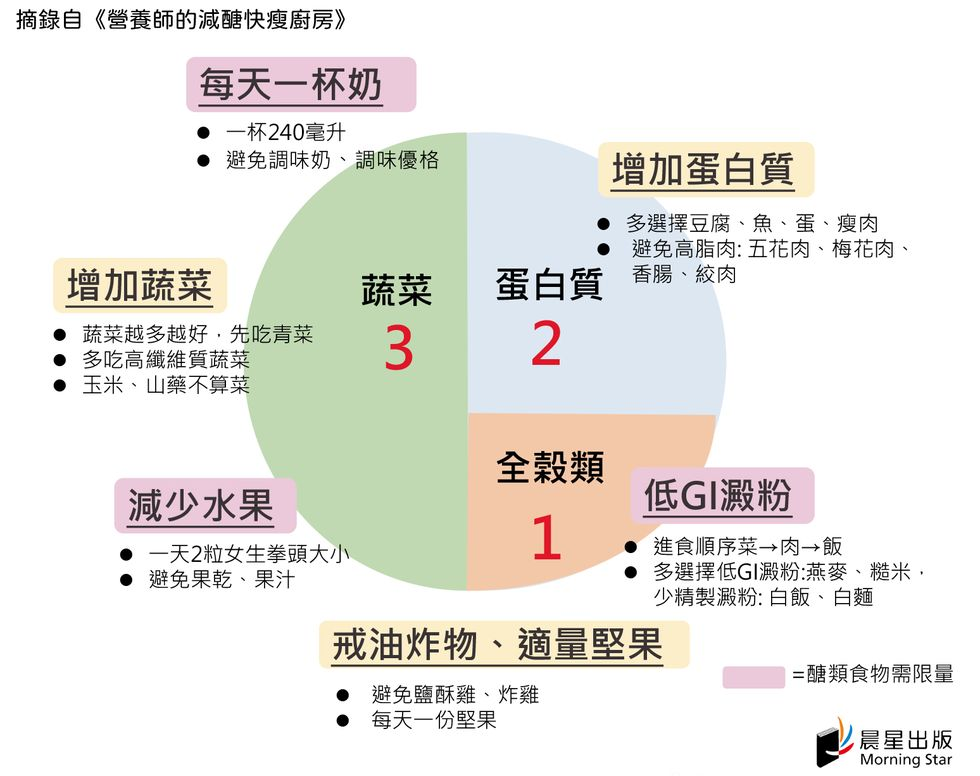

## 168斷食法（有關時間的斷食法）
168斷食的進行是以一天為單位，「16」指的是連續16小時不吃東西，「8」則是在8小時內進食一天所需的熱量。雖然在8小時內可以自由選擇想吃的食物，但營養師還是建議選擇「營養豐富的食物，例如穀物、蔬菜、瘦肉、雞蛋，以及橄欖油、酪梨等等」，在不攝取過多熱量的前提下，盡可能補充纖維質、蛋白質及健康油脂。間歇性斷食的時間建議可以省略早餐，在13:00-17:00內進食，或是在8:00-14:00內進食，不吃晚餐。

適合168斷食的人：生活作息規律、有毅力的人

公式：蛋白質10-20%、脂質20-30%、醣類（碳水化合物）50-60%

不包括：水果類、乳品類

可包含：全穀雜糧類、油類、蛋豆魚肉類、蔬菜類

##蛋白質飲食
蛋白質飲食就是以含有優質、大量的蛋白質為主食，依照個人需求安排一天中哪幾餐只能吃蛋白質，再搭配簡單運動。目的是避免減肥期間過度控制熱量攝取，導致身體肌肉量減少、基礎代謝率下降，進而影響體力與精神。這個方法也能讓減肥的人不用再忍耐飢餓感，可以吃飽又成功瘦身。

適合蛋白質飲食的人：想增肌減脂、瘦身又練出線條的人

初次嘗試蛋白質減肥法的人，可以按照以下的菜單做選擇，一日攝取熱量設定在1500 kcal，覺得肚子餓的時候：只要不會超過一天的目標攝取熱量，餐與餐之間可吃點心

早：蛋白質菜單
午：吃想吃的食物
晚：利用雞柳或豬里肌烹調的菜色

公式：碳水化合物與蛋白質的比例應為3～4：1

不包括：全穀雜糧類、水果類、乳品類、油類

可包含：蔬菜類、蛋豆魚肉類

## 生酮飲食

標準的「生酮飲食」百分比，是一天攝取5%碳水化合物、20%蛋白質，和75%脂肪。透過攝取高脂肪、極低碳水化合物及適量蛋白質的飲食模式，強迫人體燃燒脂肪，模擬「飢餓狀態」迫使身體產生「酮體」，取代葡萄糖成為能量來源達到減脂效果。生酮飲食短期能達到顯著效果，若長時間實施可能有頭暈、疲倦等負面影響。

適合生酮飲食的人：想在短時間內瘦到目標體重的人、無心血管疾病的人

生酮飲食強調「極低碳水化合物」攝取，幾乎得避免所有可消化性碳水化合物，因此限制了許多食物，例如如：飯麵、水果，甚至連含有乳糖的牛奶都必須遠離。盡量選擇含有大量優質脂肪的食物，例如：酪梨、椰子、堅果、鮭魚、橄欖油等等，都很適合正在執行生酮飲食的人。

公式：醣：蛋白質：脂肪≒5：20：75

不包括：水果類、乳品類

可包含：全穀雜糧類、蛋豆魚肉類、蔬菜類、油類

##碳水循環飲食(高碳飲食)

以一週為單位，根據運動的強度調整飲食中的碳水化合物含量。大致上分為高碳日、低碳日、無碳日，對應高強度訓練、中低強度訓練及休息恢復日，以期達到理想的增肌效果。

適合碳水循環飲食的人：有規律運動習慣或是在重訓的人

碳水循環飲食法需要個人化的菜單，請依照每日運動強度安排。碳水化合物的攝取須選擇非精緻澱粉類，例如五穀米、燕麥、地瓜等等低GI的主食，並多吃水果，攝取好的醣類。優質蛋白質則推薦雞胸肉、牛肉、雞蛋、豆漿、牛奶等等，也可以搭配高蛋白粉幫助增肌。

公式：醣：蛋白質：脂肪≒50：30：20 另外要把熱量+300~500

不包括：乳品類、油類

可包含：全穀雜糧類、蛋豆魚肉類、蔬菜類、水果類

## 參考資料

https://www.nutrifat.tw/2021/07/22/caloriecalculator/

https://www.elle.com/tw/beauty/health/g35078874/8-diet-list/

基礎代謝率：https://blog.worldgymtaiwan.com/sports-science-boost-weight-loss-by-knowing-your-bmr

## 基礎代謝率

基礎代謝率怎麼計算？
該怎麼計算BMR呢？以下是美國運動協會提供的公式(粗體的數字固定不變)：

男生=(13.7×體重(公斤))+(5.0×身高(公分))-(6.8×年齡)+66

女生=(9.6×體重(公斤))+(1.8×身高(公分))-(4.7×年齡)+655



以上是「躺著不動所消耗的熱量」，要達到增肌或減脂的目標，

你還需要計算自己每日消耗熱量(TDEE/Total Daily Energy Expenditure)，

**計算方式(粗體的數字固定不變)：**

輕度活動者(坐著或靜態工作者)＝1.1×基礎代謝率

中度活動者(站立工作者)＝1.3×基礎代謝率

重度活動者(需要大量體力工作者)＝1.5×基礎代謝率

目標是增肌 → 熱量建議攝取超過TDEE的5％～10％

目標是減脂 → 熱量建議攝取低於TDEE的10％～20％

目標是維持原本身材 → 熱量建議攝取等同TDEE的量

## 參考資料：

https://blog.worldgymtaiwan.com/sports-science-boost-weight-loss-by-knowing-your-bmr

https://www.edh.tw/article/23220